## Analysis of Congressperson Public Perception using Twitter

In [1]:
## Code based on: http://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

In [1]:
!ls findata/*.csv

findata/combined_table.csv      findata/full_data.csv
findata/final_twitter_df.csv    findata/twitter_df.csv
findata/final_twitter_df2.csv   findata/twitter_file.csv
findata/fincampaign.csv         findata/twitter_file_backup.csv
findata/fincampaign_twitter.csv


In [98]:
df_cc = pd.read_csv("findata/fincampaign.csv", names = [str(i) for i in range(12)])
df_cc[df_cc['3'] == ' KAMALA D HARRIS']
# df_cc.head()

,0,1,2,3,4,5,6,7,8,9,10,11
104,S6CA00584,2629.0,929433.0,KAMALA D HARRIS,DEM,O,14165901.0,14420677.0,13300427.0,865472.0,15350110.0,271810.0


In [95]:
df_ccc = pd.read_csv("findata/full_data.csv",names=[str(i) for i in range(30)])
df_ccc = df_ccc[['0','8','23','24','25','26','27','28','29']]
df_ccc[df_ccc['8'] == 'Kamala Harris']
# df_ccc[df_ccc['0'] == 'H001075']
# df_ccc.head()#.sort_values(by='name',ascending=False)

,0,8,23,24,25,26,27,28,29
984,H001075,Kamala Harris,115,Kamala Harris,@SenKamalaHarris,2200,500,400,"[u'@CoolHandLukette', u'@UncommonMagpie', u'@E..."


In [102]:
df_c = pd.read_csv("findata/final_twitter_df.csv")#,names=[str(i) for i in range(30)])
df_c[df_c['name'] == 'Kamala Harris']
# df_c.head()

,id,name,twitter_handle,total_tweets,pos_tweets,neg_tweets,tweet_text
554,H001075,Kamala Harris,@SenKamalaHarris,2200,500,400,"[u'@CoolHandLukette', u'@UncommonMagpie', u'@E..."


In [74]:
df1 = pd.read_csv("findata/twitter_df.csv",usecols=['name','twitter_handle','id'])#,names=[str(i) for i in range(12)])
df1 = df1.rename(columns={'id':'rep_id'})
df1.head()

,rep_id,name,twitter_handle
0,L000174,Patrick Leahy,@SenatorLeahy
1,B001288,Cory Booker,@CoryBooker
2,W000779,Ron Wyden,@RonWyden
3,S001184,Tim Scott,@SenatorTimScott
4,M001176,Jeff Merkley,@SenJeffMerkley


In [75]:
df2 = pd.read_csv("findata/fincampaign.csv", names=[str(i) for i in range(12)])
df2['rep_id'] = df2['0']
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,rep_id
0,H6PA01165,0.0,0.00,BRYAN LEIB,DEM,C,0.00,0.00,0.00,0.00,0.00,0.00,H6PA01165
1,H6NY09137,0.0,0.00,JAIME SANDERS,REP,C,0.00,0.00,0.00,0.00,0.00,0.00,H6NY09137
2,H4TX24094,0.0,1382298.68,KENNY E MR. MARCHANT,REP,I,893439.82,528905.18,174775.00,718664.82,1033312.66,200.00,H4TX24094
3,H6CA53062,0.0,57.00,MATTHEW JAMES MENDOZA,REP,C,732.00,1346.00,0.00,0.00,1464.00,0.00,H6CA53062
4,H2TX26093,0.0,478104.99,MICHAEL C. DR. BURGESS,REP,I,1361204.87,1091006.23,376458.49,984746.38,1364055.55,7593.58,H2TX26093


In [78]:
df12 = df2.merge(df1,on='rep_id', how='inner')
df12.sort_values(by='name',ascending=False).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,rep_id,name,twitter_handle


In [23]:
df = pd.read_csv("findata/twitter_file.csv",delimiter="\t",names=['twitter_handle','total_tweets','pos_tweets','neg_tweets','tweet_text'])
df.head()

,twitter_handle,total_tweets,pos_tweets,neg_tweets,tweet_text
0,@SenatorLeahy,2500,800,100,"[u'@SenatorLeahy', u'You', u'win', u'Tweet', u..."
1,@CoryBooker,7900,700,200,"[u'@CNN', u'@MSNBC', u'@BillClinton', u'@Barac..."
2,@RonWyden,3800,900,300,"[u'RT', u'@RonWyden:', u'The', u'Trump', u'adm..."
3,@SenatorTimScott,7600,2700,800,"[u'@w2the3rd', u'@SenatorTimScott', u'They', u..."
4,@SenJeffMerkley,3700,200,300,"[u'RT', u'@SenJeffMerkley:', u'Don\u2019t', u'..."


In [129]:
%%writefile twitter_merger_table.py
#Run this only once! Populates database for Twitter usernames

import pandas as pd
twitter_df = pd.read_csv('effectiveness.csv',usecols=['id','name'])

import api_utils
pp = api_utils.ProPublica()

def add_twitter(id_):
    output = pp.get_member(id_)
    try:
        output[u'twitter_account'].encode('utf-8')
        twitter_ = str("@"+output[u'twitter_account'].encode('utf-8'))
    except:
        return "None"
    return twitter_

twitter_df['twitter_handle'] = twitter_df['id'].apply(add_twitter)

twitter_df.to_csv('findata/twitter_df.csv')
effect_df = pd.read_csv('effectiveness.csv')
combined = effect_df.merge(twitter_df,on='id',how='left')
combined.to_csv('findata/combined_table.csv',header=False,index=False)

Overwriting twitter_merger_table.py


In [130]:
# from __future__ import print_function
# import re
# import tweepy
# import pandas as pd
# from tweepy import OAuthHandler
# from textblob import TextBlob
# from collections import defaultdict
# import string 
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import argparse
# import csv

!python twitter_merger_table.py

/Users/lisabarcelo/miniconda2/lib/python2.7/site-packages/cffi/model.py:532: UserWarning: 'point_conversion_form_t' has no values explicitly defined; guessing that it is equivalent to 'unsigned int'
  % self._get_c_name())


In [5]:
%%writefile publicperception.py
from __future__ import print_function
import re
import tweepy
import pandas as pd
from tweepy import OAuthHandler
from textblob import TextBlob
from collections import defaultdict
import string 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import argparse
import csv

from os import path
from IPython.display import Image
from wordcloud import WordCloud

import matplotlib.pyplot as plt

#writing to CSV file
with open('findata/twitter_file.csv','a') as f1:
    writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
    

    #argparse
    parser = argparse.ArgumentParser(description='Prepping for command line entry')
    parser.add_argument('name', type=str)
    args = parser.parse_args()
    QUERY_NAME = args.name


    #Converting rep_id to name for twitter query

    #read in CSV file
    df_t = pd.read_csv('findata/fincampaign_twitter.csv')

    #taking from capitalized to sentence case
    df_t['name'] = df_t['name'].apply(lambda x : x.title())

    #replacing titles... there most certainly is a better way to do this
    df_t['name'] = df_t['name'].apply(lambda x: x.replace('Mr. ',''))
    df_t['name'] = df_t['name'].apply(lambda x: x.replace('Dr. ',''))
    df_t['name'] = df_t['name'].apply(lambda x: x.replace('Mrs. ',''))
    df_t['name'] = df_t['name'].apply(lambda x: x.replace('Ms. ',''))

    #replacing middle names... 
    df_t['name'] = df_t['name'].apply(lambda x : x.replace(". "," "))
    df_t['name'] = df_t['name'].apply(lambda x: re.sub(r'(?:^| )\w(?:$| )', ' ', x).strip())

    #converting query ID to cleaned-up name!
    #QUERY_NAME = df_t.ix[(df_t == REP_ID).idxmax(axis=0)[0]]['name']

    #Now for the Twitter stuff

    class TwitterClient(object):
        '''
        Generic Twitter Class for sentiment analysis.
        '''
        def __init__(self):
            '''
            Class constructor or initialization method.
            '''
            # keys and tokens from the Twitter Dev Console
            consumer_key = '7UWH0Z6a97w96HG7QQOKC0fb4'
            consumer_secret = 'BZHDC01c5elCDlxKZvoU7UaRKqKCO1ptEau7UyCEIkve2j5xyo'
            access_token = '929794801716813826-bB4PUniIhbsMArpBbSeB7kZOtOMQW1q'
            access_token_secret = 'rWqdoPC1kILjejG0jSkwrT6YgVjU9GpFu0WdTGmoMhwDE'

            # attempt authentication
            try:
                # create OAuthHandler object
                self.auth = OAuthHandler(consumer_key, consumer_secret)
                # set access token and secret
                self.auth.set_access_token(access_token, access_token_secret)
                # create tweepy API object to fetch tweets
                self.api = tweepy.API(self.auth)
            except:
                print("Error: Authentication Failed")

        def clean_tweet(self, tweet):
            '''
            Utility function to clean tweet text by removing links, special characters
            using simple regex statements.
            '''
            return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

        def get_tweet_sentiment(self, tweet):
            '''
            Utility function to classify sentiment of passed tweet
            using textblob's sentiment method
            '''
            # create TextBlob object of passed tweet text
            analysis = TextBlob(self.clean_tweet(tweet))
            # set sentiment
            if analysis.sentiment.polarity > 0:
                return 'positive'
            elif analysis.sentiment.polarity == 0:
                return 'neutral'
            else:
                return 'negative'

        def get_tweets(self, query, count = 10):
            '''
            Main function to fetch tweets and parse them.
            '''
            # empty list to store parsed tweets
            tweets = []

            try:
                # call twitter api to fetch tweets
                fetched_tweets = self.api.search(q = query, count = count)

                # parsing tweets one by one
                for tweet in fetched_tweets:
                    # empty dictionary to store required params of a tweet
                    parsed_tweet = {}

                    # saving text of tweet
                    parsed_tweet['text'] = tweet.text
                    # saving sentiment of tweet
                    parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)

                    # appending parsed tweet to tweets list
                    if tweet.retweet_count > 0:
                        # if tweet has retweets, ensure that it is appended only once
                        if parsed_tweet not in tweets:
                            tweets.append(parsed_tweet)
                    else:
                        tweets.append(parsed_tweet)

                # return parsed tweets
                return tweets

            except tweepy.TweepError as e:
                # print error (if any)
                print("Error : " + str(e))

    def main():
        # creating object of TwitterClient Class
        api = TwitterClient()
        # calling function to get tweets
        tweets = api.get_tweets(query = QUERY_NAME, count = 200)

        print ("Public Perception of ", QUERY_NAME, "\n")
#         #what is our total amount of tweets
#         print("Total tweets: {}".format(100*len(tweets)))

#         # picking positive tweets from tweets
        ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
#         # percentage of positive tweets
#         print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
#         # picking negative tweets from tweets
        ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
#         # percentage of negative tweets
#         print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
#         # percentage of neutral tweets
#         print("Neutral tweets percentage: {} % ".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

        #cleaning up topics list from https://www.congress.gov/browse/policyarea/115th-congress
        topics_list = [
        'Agriculture and Food [127]', 'Animals [52]','Armed Forces and National Security [664]','Arts, Culture, Religion [33]',
        'Civil Rights and Liberties, Minority Issues [111]',
        'Commerce [155]','Congress [306]','Crime and Law Enforcement [445]','Economics and Public Finance [96]',
        'Education [308]','Emergency Management [103]','Energy [212]',
        'Environmental Protection [195]','Families [44]','Finance and Financial Sector [270]',
        'Foreign Trade and International Finance [55]','Government Operations and Politics [573]',
        'Health [791]','Housing and Community Development [80]','Immigration [222]',
        'International Affairs [475]','Labor and Employment [214]','Law [74]',
        'Native Americans [106]','Public Lands and Natural Resources [439]','Science, Technology, Communications [180]',
        'Social Sciences and History [4]','Social Welfare [97]','Sports and Recreation [44]',
        'Taxation [647]','Transportation and Public Works [249]','Water Resources Development [46]']

        #cleaning up topics
        topics_ = [str(item).split("[")[0] for item in topics_list]

        #Adding some interesting topics
        topics_.insert(0,"Money")
        topics_.insert(0,"America")

        #making dictionary to keep track of the topics being discussed online
        topics_dict = defaultdict(dict)

        stop_words = set(stopwords.words( 'english' ))
        tweets_ = list(tweets)

        list_of_tweets = [w['text'] for w in tweets_]

        #turning list of strings into string
        list_of_tweets = " ".join(list_of_tweets)
        list_of_tweets = list(list_of_tweets.split(" "))
        #words_in_tweets = [w.encode('utf-8').translate(None, string.punctuation).lower() for w in list_of_tweets.split(" ")]

#         #to hold words for wordcloud
#         text_list = []

#         #take out stopwords
        filtered_sentence = [w for w in list_of_tweets if not w in stop_words]
#         for item in topics_:
#             topic_string = item.translate(None, string.punctuation).lower()
#             for i in filtered_sentence:
#                 text_list.append(i)
#                 if i in topic_string:
#                     if len(i) > 2:
#                         try:
#                             if topics_dict[item][i]:
#                                 topics_dict[item][i] += 1  
#                             else:
#                                 topics_dict[item][i] = 1
#                         except:
#                             topics_dict[item][i] = 1                      

#         #joining text_list to string
#         text = " ".join(text_list)

        ###Topic Summary

#         if not topics_dict:
#             print ("\nTopics: Variety")
#         else:
#             print ("\nTopics: \n")
#             i = 1
#             for k,v in topics_dict.iteritems():
#                 print (i," - ", k, ": ", sum(v.values()),"tweet(s).")
#                 i += 1

        #word cloud portion!
#             wordcloud = WordCloud().generate(text)
#             wordcloud = WordCloud(max_font_size=40).generate(text)
#             plt.figure()
#             plt.imshow(wordcloud, interpolation="bilinear")
#             plt.axis("off")
#             plt.savefig('word_cloud.png')
    #         #plt.show(block=True);


        #Writing to CSV file (part 2):
        row = list((QUERY_NAME, str(100*len(tweets_)),str(100*len(ptweets)),str(100*len(ntweets)),list_of_tweets))
        writer.writerow(row)

    if __name__ == "__main__":
        # calling main function
        main()

Overwriting publicperception.py


In [130]:
!python -W ignore publicperception.py  "@SenatorTimScott" 

Public Perception of  @SenatorTimScott 

Total tweets: 6900
Positive tweets percentage: 37 %
Negative tweets percentage: 5 %
Neutral tweets percentage: 56 % 


In [ ]:
# from IPython.display import Image
# Image(filename='word_cloud.png')https://api.twitter.com/1.1/application/rate_limit_status.json3

In [90]:
##Trying to build a database.....
# from datetime import datetime

# start_time = datetime.now()

# h = pd.read_csv('findata/twitter_df.csv')
# #%timeit
# for id_ in h['twitter_handle'][1600::]:
#     !python -W ignore publicperception.py {id_}
    
# print ("** COMPLETE **")

# end_time = datetime.now()
# print("Time Elapsed: ", end_time - start_time)

In [83]:
hh = pd.read_csv('findata/twitter_file.csv', delimiter="\t", names=['name','num_tweets','pos_tweets','neg_tweets','tweet_text'])
print (len(hh))
print (hh.tail())

1643
                  name  num_tweets  pos_tweets  neg_tweets  \
1638     @RepLoisCapps         200           0           0   
1639   @RepMikeCapuano        5400        1600         600   
1640   @USRepRHinojosa         700           0           0   
1641  @RepChrisStewart        4600        1100         600   
1642    @RepJasonSmith        6800        2100        1700   

                                             tweet_text  
1638  [u'RT', u'@SeriousMI:', u'Upd.', u'To', u'Help...  
1639  [u'RT', u'@RepMikeCapuano:', u'The', u'Republi...  
1640  [u'@trucker_mfc', u'@POTUS', u'@ELD_or_ME', u'...  
1641  [u'RT', u'@Freedom4Horses:', u'&gt;', u'@RepCh...  
1642  [u'RT', u'@RepJasonSmith:', u'Our', u'current'...  


In [84]:
!cp findata/twitter_file.csv findata/twitter_file_backup.csv

In [114]:
##Merging FULL data table
# twitter_df = pd.read_csv('effectiveness.csv',usecols=['id','name'])
# twitter_df.to_csv('findata/twitter_df.csv')
# effect_df = pd.read_csv('effectiveness.csv')
# combined = effect_df.merge(twitter_df,on='id',how='left')
# combined.to_csv('findata/combined_table.csv',header=False,,index=False)

In [161]:
# t = pd.read_csv('findata/twitter_df.csv')
# t.head()

In [162]:
# t = pd.read_csv('findata/combined_table.csv',header='infer')
# t.columns = [str(i) for i in range(len(t.columns))]
# t.head()

In [163]:
# ttt = pd.read_csv('effectiveness.csv')
# print( list(ttt.columns), len(ttt.columns))

In [164]:
# tt = pd.read_csv('findata/twitter_file.csv',delimiter='\t',names=["25","26","27","28","29"])
# tt.head()

In [165]:
# total_ = t.merge(tt,on='25',how='left')
# total_.head()

In [166]:
# total_.to_csv('findata/full_data.csv',header=False,index=False)

In [192]:
%%writefile twitter_transform.py

import pandas as pd

df_t1 = pd.read_csv('findata/twitter_df.csv',usecols=['id','name','twitter_handle'])
df_t2 = pd.read_csv('findata/twitter_file.csv',delimiter='\t',names=[str(i) for i in range(5)])
df_t2 = df_t2.rename(columns={'0':'twitter_handle'})
df_t = df_t1.merge(df_t2,on='twitter_handle',how='left')
df_t.head()
df_t = df_t.rename(columns={'1':'total_tweets','2':'pos_tweets','3':'neg_tweets','4':'tweet_text'})


df_t = df_t.sort_values(by='total_tweets',ascending=False)
df_t = df_t.drop_duplicates(subset=['id'],keep='first')
df_t.to_csv('findata/final_twitter_df.csv',header=True,index=False)
df_t.head()

Writing twitter_transform.py


In [189]:
%%writefile publicperceptiontest.py

import re, string
import pandas as pd
import argparse
from IPython.display import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import defaultdict

#argparse
parser = argparse.ArgumentParser(description='Prepping for command line entry')
parser.add_argument('name', type=str)
args = parser.parse_args()
REP_ID = args.name


#Converting rep_id to name for twitter query

df_t = pd.read_csv('findata/final_twitter_df.csv')

print "Public Perception of ", df_t.loc[df_t['id'] == REP_ID, 'name'].item(), "\n"
print "Total Tweets: ", df_t.loc[df_t['id'] == REP_ID, 'total_tweets'].item(), "\n"
print "Positive Tweets: ", df_t.loc[df_t['id'] == REP_ID, 'pos_tweets'].item(), "\n"
print "Negative Tweets: ", df_t.loc[df_t['id'] == REP_ID, 'neg_tweets'].item(), "\n"


topics_list = [
'Agriculture and Food [127]', 'Animals [52]','Armed Forces and National Security [664]','Arts, Culture, Religion [33]',
'Civil Rights and Liberties, Minority Issues [111]',
'Commerce [155]','Congress [306]','Crime and Law Enforcement [445]','Economics and Public Finance [96]',
'Education [308]','Emergency Management [103]','Energy [212]',
'Environmental Protection [195]','Families [44]','Finance and Financial Sector [270]',
'Foreign Trade and International Finance [55]','Government Operations and Politics [573]',
'Health [791]','Housing and Community Development [80]','Immigration [222]',
'International Affairs [475]','Labor and Employment [214]','Law [74]',
'Native Americans [106]','Public Lands and Natural Resources [439]','Science, Technology, Communications [180]',
'Social Sciences and History [4]','Social Welfare [97]','Sports and Recreation [44]',
'Taxation [647]','Transportation and Public Works [249]','Water Resources Development [46]']

#cleaning up topics
topics_ = [str(item).split("[")[0] for item in topics_list]

stop_words = set(stopwords.words( 'english' ))

# #Adding some interesting topics
topics_.insert(0,"Democrat")
topics_.insert(0,"Republican")
topics_.insert(0,str(df_t.loc[df_t['id'] == REP_ID, 'twitter_handle'].item()))

#making dictionary to keep track of the topics being discussed online
topics_dict = defaultdict(dict)
# topics_dict = {}

#cleaning text

text = df_t.loc[df_t['id'] == REP_ID, 'tweet_text'].item().replace("u'",'').lower()
text = ' '.join([str(i).strip("'[]") for i in text.split(",")])
text_list = list(text.split("  "))

#organizing text
topic_string = [str(i).lower() for i in topics_]


for item in topic_string:
    for i in text_list:
        if i in item:
            if len(i)>2:
                if i not in stop_words:
                    try:
                        if topics_dict[item][i]:
                            topics_dict[item][i] += 1  
                        else:
                            topics_dict[item][i] = 1
                    except:
                        topics_dict[item][i] = 1                      
                    #next

##Topic Summary

if not topics_dict:
    print ("\nTopics: Variety")
else:
    print ("\nTopics: \n")
    i = 1
    for k,v in topics_dict.iteritems():
        print i," - ", k.title(), ": ", sum(v.values()),"tweet(s)."
        i += 1
        
        
        
#word cloud portion!

wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('word_cloud.png');

Overwriting publicperceptiontest.py


In [190]:
!python publicperceptiontest.py 'H001075'

Public Perception of  Kamala Harris 

Total Tweets:  2200 

Positive Tweets:  500 

Negative Tweets:  400 


Topics: 

1  -  Health  :  1 tweet(s).
2  -  Government Operations And Politics  :  1 tweet(s).
3  -  Democrat :  2 tweet(s).
4  -  Taxation  :  2 tweet(s).
5  -  Civil Rights And Liberties, Minority Issues  :  1 tweet(s).
6  -  Immigration  :  1 tweet(s).
7  -  @Senkamalaharris :  15 tweet(s).
8  -  Environmental Protection  :  1 tweet(s).


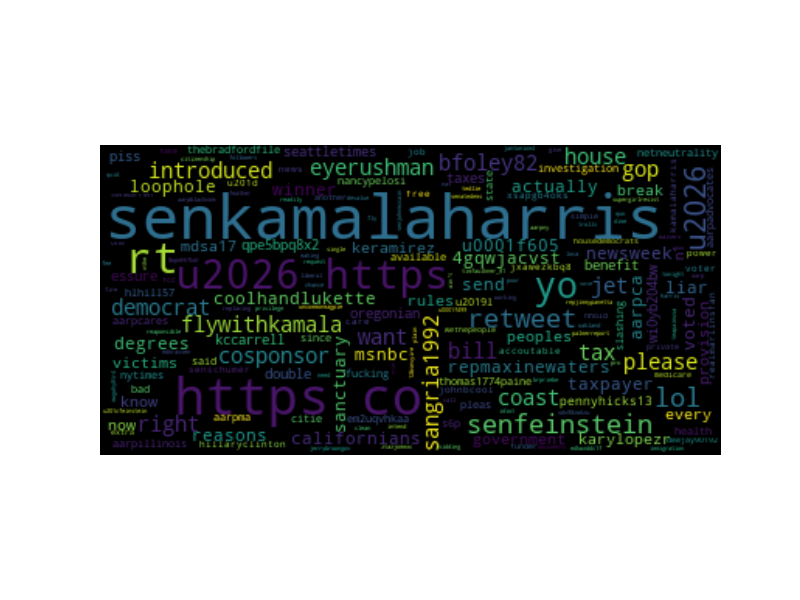

In [191]:
from IPython.display import Image
Image(filename='word_cloud.png')